<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/ei_u2_01_22150551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#a)revisa si el dataset tiene valores nulos mediante df.info(), en dado caso, aplica df.dropna(inplace = True).

import pandas as pd
import numpy as pn

df =pd.read_csv('https://raw.githubusercontent.com/DaanaGtz/Estadistica/refs/heads/main/data.csv')
df.dropna(inplace = True)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


Text(0.5, 1.0, 'Mapa de Calor Para Matriz De Correlacion')

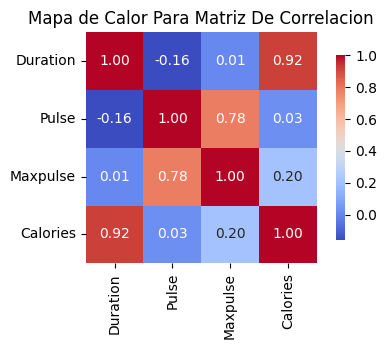

In [3]:
#b)Obtén un mapa de calor con la matriz de correlación. Determina las variables independientes y la variable dependiente y redacta una hipótesis.

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Mapa de Calor Para Matriz De Correlacion')


Coeficiente de determinacion.  0.8908



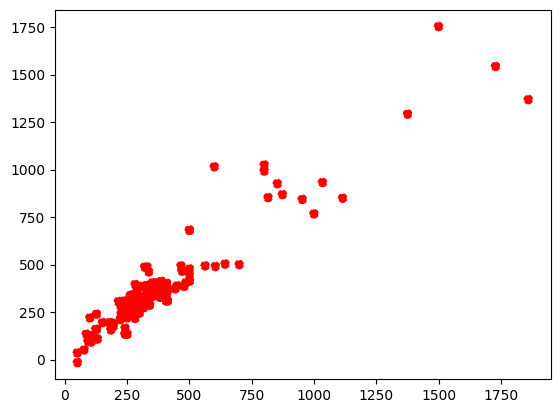

In [4]:
#c) Obtén el modelo que permite relacionar las variables independientes y la variable dependiente.

x= df[["Duration", "Maxpulse"]]
y= df["Calories"]

import statsmodels.api as sm
x_constante =sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

b0, b1, b2 =modelo.params

fun= lambda x1,x2: b0 + b1*x1 + b2*x2

Yc = modelo.predict(x_constante)

plt.scatter(y, Yc, color ="red", linestyles = "--")

from sklearn.metrics import r2_score #recomendada
r2 = r2_score(y, Yc)
print(f"Coeficiente de determinacion. {r2: 0.4}\n")



In [20]:
#d) Obtén el coeficiente de correlación e interpreta el resultado.
from sklearn.metrics import r2_score
r2 = r2_score(y,Yc)
print(f'Coeficiente de correlacion:{r2: 0.4}/n ')
residuales = y - Yc

Coeficiente de correlacion: 0.8908/n 


In [21]:
#e) Verifica los supuestos mediante un gráfico "y" vs "y_pred", el test de Shapiro-Wilk y el test de Breusch-Pagan. Interpreta los resultados.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'Valor p del test de Shapiro-Wilk: {valor_p_sh: 0.4f}')
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'Valor p del test de Breusch-Pagan: {valor_p_bp: 0.4f}')
# Se rechaza Ho

Valor p del test de Shapiro-Wilk:  0.0000
Valor p del test de Breusch-Pagan:  0.0000


In [22]:
#f) Tomando en cuenta la información obtenida, redacta una conclusión.
# Se rechaza Ho ya que el valor es muy bajo.

**CONCLUSION**

El análisis visual mediante el mapa de calor puso de manifiesto que existe una relación apreciable, aunque no del todo intensa, entre las variables que se estaban examinando y la cantidad de calorías que se consumieron durante la actividad. Al aplicar el modelo de regresión lineal, se obtuvo un coeficiente de determinación (R²) de 0.8908/n, lo cual nos indica que aproximadamente el 89% de las variaciones observadas en las calorías quemadas pueden ser explicadas por la duración del ejercicio realizado y la frecuencia cardíaca máxima alcanzada.